In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt

In [3]:
tf.enable_eager_execution()
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [4]:
df = pd.read_csv("data/metadata.csv")

In [5]:
df

,card_file_name,id,link,name,rarity,setname,type
0,data/pictures/Base Set/Alakazam_(Base_Set_1),1/102,https://bulbapedia.bulbagarden.net/wiki/Alakaz...,Alakazam,Rare Holo,Base Set,Psychic
1,data/pictures/Base Set/Blastoise_(Base_Set_2),2/102,https://bulbapedia.bulbagarden.net/wiki/Blasto...,Blastoise,Rare Holo,Base Set,Water
2,data/pictures/Base Set/Chansey_(Base_Set_3),3/102,https://bulbapedia.bulbagarden.net/wiki/Chanse...,Chansey,Rare Holo,Base Set,Colorless
3,data/pictures/Base Set/Charizard_(Base_Set_4),4/102,https://bulbapedia.bulbagarden.net/wiki/Chariz...,Charizard,Rare Holo,Base Set,Fire
4,data/pictures/Base Set/Clefairy_(Base_Set_5),5/102,https://bulbapedia.bulbagarden.net/wiki/Clefai...,Clefairy,Rare Holo,Base Set,Colorless
5,data/pictures/Base Set/Gyarados_(Base_Set_6),6/102,https://bulbapedia.bulbagarden.net/wiki/Gyarad...,Gyarados,Rare Holo,Base Set,Water
6,data/pictures/Base Set/Hitmonchan_(Base_Set_7),7/102,https://bulbapedia.bulbagarden.net/wiki/Hitmon...,Hitmonchan,Rare Holo,Base Set,Fighting
7,data/pictures/Base Set/Machamp_(Base_Set_8),8/102,https://bulbapedia.bulbagarden.net/wiki/Macham...,Machamp,Rare Holo,Base Set,Fighting
8,data/pictures/Base Set/Magneton_(Base_Set_9),9/102,https://bulbapedia.bulbagarden.net/wiki/Magnet...,Magneton,Rare Holo,Base Set,Lightning
9,data/pictures/Base Set/Mewtwo_(Base_Set_10),10/102,https://bulbapedia.bulbagarden.net/wiki/Mewtwo...,Mewtwo,Rare Holo,Base Set,Psychic


# Drop a couple of bad records

In [15]:
df = df[~df["card_file_name"].isin([
    "data/pictures/Mysterious Treasures/Honchkrow_(Mysterious_Treasures_10)",
    "data/pictures/Unified Minds/Umbreon_%26_Darkrai-GX_(Unified_Minds_125)", # missing on website
    "data/pictures/Base Set/Charizard_(Base_Set_4)", # special version of normal website
    "data/pictures/Stormfront/Charizard_(Stormfront_103)", # special version of normal website
])]

import os
df = df[np.array([os.path.exists(f) for f in df["card_file_name"]])]

filter to Pokemon types

In [16]:
# df.type.value_counts()
filter_to_pokemon_types = False
filter_to_simple_rarities = False

if filter_to_pokemon_types:
    df = df[df["type"].isin([
        "Water",
        "Grass",
        "Colorless",
        "Psychic",
        "Fighting",
        "Fire",
        "Lightning",
        "Darkness",
        "Metal",
        "Dragon",
        "Fairy",
    ])]

if filter_to_simple_rarities:
    df = df[df["rarity"].isin([
        "Common",
        "Uncommon",
        "Rare",
        "Rare Holo",
        "Rare Holo ex",
    ])]


# Parameters

In [58]:
n_epochs = 200
n_random_inputs_per_training = 800
n_real_per_training = 4000
batch_size = 100

n_generator_input = 100
n_generator_dense = 200

use_greyscale = False

columns_as_input = [
    "rarity",
    "type",
#     "setname",
]

# Create dataset

In [59]:
# Function to load and preprocess each image
def parse_image_file(
    filename,
    label = None,
    crop=False,
    to_greyscale=False,
):
    img = tf.io.read_file(filename)
    img = tf.cast(tf.image.decode_jpeg(img, channels=3), tf.float32) / 255.0
    
#     if img.shape[0] < 50:
#         print(f"Error with image `{filename}`: shape found was small: {img.shape}")
    img = tf.image.resize_image_with_crop_or_pad(img, 260, 180)
    
    # Some images have an extra alpha channel. Remove that.
    img = img[:, :, :3]
    
    if crop:
        img = tf.image.crop_to_bounding_box(
            img, 
            offset_height = 35,
            offset_width = 20,
            target_height = 100,
            target_width = 140,
        )
        
    if to_greyscale:
        img = tf.image.rgb_to_grayscale(img)
        img = tf.expand_dims(img, -1)
    
    if label is None: return img
    else: return img, label

In [60]:
n_records = df.shape[0]

In [39]:
images = tf.constant(df["card_file_name"].values)
x = tf.stack([parse_image_file(img, crop=True, to_greyscale=use_greyscale) for img in images], axis=0)
gc.collect()

KeyboardInterrupt: 

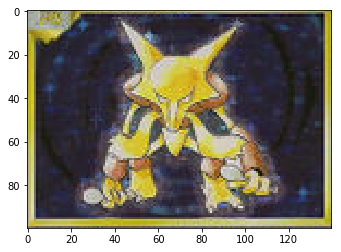

In [61]:
plt.imshow(tf.squeeze(x[0]), cmap='gray')

### Make the class dataset

In [62]:
def label_converter(label):
    return tf.math.argmax(label, axis=-1)

def make_conversion_function(classes):
    return lambda idx: convert_column(idx, classes)

def convert_column(idx, classes):
    return tf.gather(classes, idx)
    
def target_columns_to_tf(column_names):
    y = {}
    size_per_class = []
    conversion_functions = {}
    
    for colname in column_names:
        col = df[colname]
        classnames, indices = np.unique(col.values, return_inverse=True)
        classnames = np.append(classnames, "Fake")
        n_classes = len(classnames)
        size_per_class.append(n_classes)
        
        conversion_functions[colname] = make_conversion_function(classnames)
        y[colname] = keras.utils.to_categorical(indices, n_classes)

    return (
        y,
        size_per_class,
        conversion_functions,
    )

In [63]:
y, size_per_class, conversion_functions = target_columns_to_tf(columns_as_input)

def convert_target_matrix_to_label(pred, colname):
    current_start_index = 0
    pred = pred[colname]
    
    label_indices = label_converter(pred)
    return conversion_functions[colname](label_indices)


In [64]:
convert_target_matrix_to_label(y, columns_as_input[0])

<tf.Tensor: id=578349, shape=(9930,), dtype=string, numpy=
array([b'Rare Holo', b'Rare Holo', b'Rare Holo', ..., b'Unknown rarity',
       b'Unknown rarity', b'Unknown rarity'], dtype=object)>

# Split dataset

In [65]:
all_data = tf.data.Dataset.from_tensor_slices(
    (x, y)
).shuffle(10000)

In [66]:
train_frac = .7
batch_size = 50

train = all_data.take(int(train_frac * n_records)).batch(batch_size)
remaining_data = all_data.skip(int(train_frac * n_records))

validate = remaining_data.take(int(.5 * (1 - train_frac) * n_records)).batch(batch_size)
test = remaining_data.skip(int(.5 * (1 - train_frac) * n_records)).batch(batch_size)

# Model

In [70]:
inputs = keras.layers.Input(shape=x[0].shape)
x_1 = keras.layers.Dropout(.3)(x_1)
x_1 = keras.layers.Conv2D(filters=10, kernel_size=5, strides=2)(inputs)
x_1 = keras.layers.MaxPool2D()(x_1)
x_1 = keras.layers.Dropout(.3)(x_1)
x_1 = keras.layers.Conv2D(filters=10, kernel_size=5, strides=2)(x_1)
x_1 = keras.layers.MaxPool2D()(x_1)
x_1 = keras.layers.Flatten()(x_1)
x_1 = keras.layers.Dropout(.3)(x_1)
x_1 = keras.layers.Dense(units=80)(x_1)
x_1 = keras.layers.LeakyReLU()(x_1)
x_1 = keras.layers.BatchNormalization()(x_1)
x_1 = keras.layers.Dropout(.3)(x_1)
x_1 = keras.layers.Dense(units=80)(x_1)
x_1 = keras.layers.LeakyReLU()(x_1)
x_1 = keras.layers.BatchNormalization()(x_1)
x_1 = keras.layers.Dropout(.3)(x_1)

outputs = {
    colname: keras.layers.Dense(units=size, activation="softmax", name=colname)(x_1) 
    for colname, size in zip(columns_as_input, size_per_class)
}

model = keras.Model(inputs, outputs, name="multi-classifier")

In [71]:
model.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=.001),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.categorical_accuracy]
)
model.summary()

Model: "multi-classifier"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 100, 140, 3) 0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 48, 68, 10)   760         input_8[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_14 (MaxPooling2D) (None, 24, 34, 10)   0           conv2d_14[0][0]                  
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 24, 34, 10)   0           max_pooling2d_14[0][0]           
___________________________________________________________________________________

# Training

In [72]:
gc.collect()
try:
    model.fit(train, validation_data=validate, epochs=22, shuffle=True)
finally:
    gc.collect()

Epoch 1/22
140/140 [==============================] - 14s 97ms/step - loss: 6.6068 - rarity_loss: 3.2129 - type_loss: 3.3938 - rarity_categorical_accuracy: 0.1214 - type_categorical_accuracy: 0.0970 - val_loss: 4.8853 - val_rarity_loss: 2.2241 - val_type_loss: 2.6611 - val_rarity_categorical_accuracy: 0.3022 - val_type_categorical_accuracy: 0.2203
Epoch 2/22
140/140 [==============================] - 7s 52ms/step - loss: 5.1673 - rarity_loss: 2.3573 - type_loss: 2.8100 - rarity_categorical_accuracy: 0.2421 - type_categorical_accuracy: 0.1620 - val_loss: 5.0443 - val_rarity_loss: 2.2253 - val_type_loss: 2.8191 - val_rarity_categorical_accuracy: 0.1968 - val_type_categorical_accuracy: 0.1464
Epoch 3/22
140/140 [==============================] - 7s 53ms/step - loss: 4.6324 - rarity_loss: 2.0577 - type_loss: 2.5746 - rarity_categorical_accuracy: 0.2818 - type_categorical_accuracy: 0.1903 - val_loss: 4.2290 - val_rarity_loss: 1.8490 - val_type_loss: 2.3799 - val_rarity_categorical_accuracy:

KeyboardInterrupt: 

# Test a couple of records

In [45]:
def plot_and_predict(img):
    assert img.shape[0] == 1, "Please only provide a single image at a time"
    
    prediction = model.predict(img)
    labels = {k: convert_target_matrix_to_label(prediction, k) for k in prediction}
    
    plt.imshow(img[0])
    plt.title(labels)
    plt.title(class_name)
    

In [46]:
for vis_x, _ in train.take(1):
    for i in range(vis_x.shape[0]):
        plot_and_predict(vis_x[i:i+1])
        plt.show()
gc.collect()

IndexError: arrays used as indices must be of integer (or boolean) type